## SIMPLE LINEAR REGRESSION                                               
                                                                                         - M.NAGA CHARITAVYA
                                                                                             AP21110010027

### 1. Implement Linear Regression and calculate sum of residual error on the following Datasets.
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

y = [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]

Compute the regression coefficients using analytic formulation and calculate Sum Squared Error (SSE) and R 2 value.

Implement gradient descent (both Full-batch and Stochastic with stoppingcriteria) on Least Mean Square loss formulation to compute the coefficients of regression matrix and compare the results using performance measures such as R 2 SSE etc.

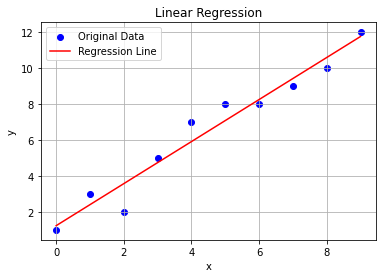

Residual Errors [-0.23636364  0.59393939 -1.57575758  0.25454545  1.08484848  0.91515152
 -0.25454545 -0.42424242 -0.59393939  0.23636364]
Analytical Solution:
Coefficients: [1.23636364 1.16969697]
Sum of Squared Error (SSE): 5.624242424242421
R-squared value: 0.952538038613988


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

X = np.vstack([np.ones_like(x), x]).T
coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

y_pred = X.dot(coefficients)

residual_error = y - y_pred
sum_squared_error = np.sum(residual_error ** 2)

total_sum_squares = np.sum((y - np.mean(y)) ** 2)

r_squared = 1 - (sum_squared_error / total_sum_squares)

plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("Residual Errors",residual_error)
print("Analytical Solution:")
print("Coefficients:", coefficients)
print("Sum of Squared Error (SSE):", sum_squared_error)
print("R-squared value:", r_squared)

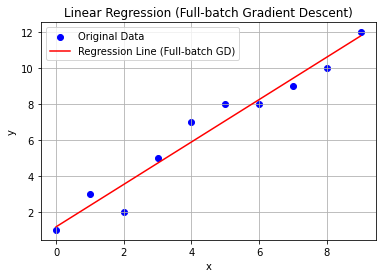

Residual Errors [-0.23636364  0.59393939 -1.57575758  0.25454545  1.08484848  0.91515152
 -0.25454545 -0.42424242 -0.59393939  0.23636364]

Full-batch Gradient Descent:
Coefficients: [1.17580361 1.17935476]
Sum of Squared Error (SSE): 5.634861529064237
R-squared value: 0.9524484259150697


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

def gradient(X, y, theta):
    m = len(y)
    return X.T.dot(X.dot(theta) - y) / m

def gradient_descent(X, y, learning_rate, iterations):
    theta = np.zeros(X.shape[1])
    for _ in range(iterations):
        theta -= learning_rate * gradient(X, y, theta)
    return theta

learning_rate = 0.01
iterations = 1000

X = np.vstack([np.ones_like(x), x]).T
theta_full_batch = gradient_descent(X, y, learning_rate, iterations)
y_pred_full_batch = X.dot(theta_full_batch)

plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred_full_batch, color='red', label='Regression Line (Full-batch GD)')
plt.title('Linear Regression (Full-batch Gradient Descent)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

residual_error_full_batch = y - y_pred_full_batch
sum_squared_error_full_batch = np.sum(residual_error_full_batch ** 2)

total_sum_squares = np.sum((y - np.mean(y)) ** 2)

r_squared_full_batch = 1 - (sum_squared_error_full_batch / total_sum_squares)

print("Residual Errors",residual_error)
print("\nFull-batch Gradient Descent:")
print("Coefficients:", theta_full_batch)
print("Sum of Squared Error (SSE):", sum_squared_error_full_batch)
print("R-squared value:", r_squared_full_batch)

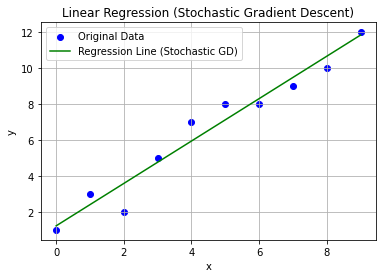

Residual Errors [-0.23636364  0.59393939 -1.57575758  0.25454545  1.08484848  0.91515152
 -0.25454545 -0.42424242 -0.59393939  0.23636364]

Stochastic Gradient Descent:
Coefficients: [1.22720334 1.17951589]
Sum of Squared Error (SSE): 5.644463731894105
R-squared value: 0.9523673946675603


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

# Define functions for gradient descent
def gradient(X, y, theta):
    m = len(y)
    return X.T.dot(X.dot(theta) - y) / m

def stochastic_gradient_descent(X, y, learning_rate, max_epochs, tol=1e-4):
    theta = np.zeros(X.shape[1])
    prev_loss = float('inf')
    for epoch in range(max_epochs):
        for i in range(len(y)):
            rand_index = np.random.randint(len(y))
            X_i = X[rand_index: rand_index + 1]
            y_i = y[rand_index: rand_index + 1]
            gradients = gradient(X_i, y_i, theta)
            theta -= learning_rate * gradients
        loss = np.mean((X.dot(theta) - y) ** 2)
        if abs(prev_loss - loss) < tol:
            break
        prev_loss = loss
    return theta

# Stochastic gradient descent with stopping criteria
learning_rate = 0.01
max_epochs = 1000

# Analytical solution for linear regression coefficients
X = np.vstack([np.ones_like(x), x]).T
theta_stochastic = stochastic_gradient_descent(X, y, learning_rate, max_epochs)
y_pred_stochastic = X.dot(theta_stochastic)

# Plotting the original data and regression line obtained through stochastic gradient descent
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred_stochastic, color='green', label='Regression Line (Stochastic GD)')
plt.title('Linear Regression (Stochastic Gradient Descent)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Residual error
residual_error_stochastic = y - y_pred_stochastic
sum_squared_error_stochastic = np.sum(residual_error_stochastic ** 2)

# Total sum of squares
total_sum_squares = np.sum((y - np.mean(y)) ** 2)

# R-squared value
r_squared_stochastic = 1 - (sum_squared_error_stochastic / total_sum_squares)

print("Residual Errors",residual_error)
print("\nStochastic Gradient Descent:")
print("Coefficients:", theta_stochastic)
print("Sum of Squared Error (SSE):", sum_squared_error_stochastic)
print("R-squared value:", r_squared_stochastic)

### Download Boston Housing Rate Dataset. Analyse the input attributes and find out the attribute that best follow the linear relationship with the output price. Implement both the analytic formulation and gradient descent (Full-batch, stochastic) on LMS loss formulation to compute the coefficients of regression matrix and compare the results.

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import requests
from io import StringIO

# Step 1: Load the Boston Housing dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
response = requests.get(url)
data = response.text

# Parse the data into a pandas DataFrame
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.read_csv(StringIO(data), delim_whitespace=True, names=names)

# Extract features and target variable
X = df.drop(columns=['MEDV']).values
y = df['MEDV'].values

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Preprocess the data (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Compute correlation coefficients
correlation_coefficients = np.abs(np.corrcoef(X_train_scaled.T, y_train)[0, 1:])

# Step 5: Find the attribute with the highest correlation coefficient
best_attribute_index = np.argmax(correlation_coefficients)
best_attribute_name = names[best_attribute_index]
print("Attribute with the highest correlation with price:", best_attribute_name)

# Step 6: Implement analytic formulation and gradient descent
# Analytic solution
X_train_with_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
analytic_solution = np.linalg.inv(X_train_with_bias.T.dot(X_train_with_bias)).dot(X_train_with_bias.T).dot(y_train)

# Full-batch gradient descent
def full_batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    theta = np.random.randn(X.shape[1])
    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta

# Stochastic gradient descent
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    theta = np.random.randn(X.shape[1])
    for iteration in range(n_iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
    return theta

# Compute coefficients using full-batch gradient descent
theta_full_batch = full_batch_gradient_descent(X_train_with_bias, y_train)

# Compute coefficients using stochastic gradient descent
theta_stochastic = stochastic_gradient_descent(X_train_with_bias, y_train)

# Step 7: Compare the results
print("Analytic solution coefficients:", analytic_solution)
print("Full-batch gradient descent coefficients:", theta_full_batch)
print("Stochastic gradient descent coefficients:", theta_stochastic)

Attribute with the highest correlation with price: DIS
Analytic solution coefficients: [22.79653465 -1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194
  3.14523956 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151
  1.12956831 -3.61165842]
Full-batch gradient descent coefficients: [22.79653461 -0.94023591  0.56814827  0.04348218  0.75220646 -1.93075812
  3.20182898 -0.18615637 -2.99638095  1.54694778 -1.00545754 -2.00207771
  1.12529743 -3.59780146]
Stochastic gradient descent coefficients: [22.25548969 -1.62149925  0.40489785 -0.6514384  -0.14266953 -2.44458319
  3.81222807 -0.70056559 -2.7349921   1.81354015 -1.53981851 -1.7112737
  0.99434655 -3.68192112]
